In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
!pip install chart_studio
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import itertools
import statsmodels.api as sm
!pip install pmdarima
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
!pip install pyspark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c073cb3c-42e0-45d5-83fc-fde60d00aa96/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c073cb3c-42e0-45d5-83fc-fde60d00aa96/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c073cb3c-42e0-45d5-83fc-fde60d00aa96/bin/python -m pip install --upgrade pip' command.


In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType
df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/city_day.csv"))

In [0]:
display(df)

City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Ahmedabad,2015-01-01T00:00:00.000+0000,null,null,0.92,18.22,17.15,null,0.92,27.64,133.36,0.0,0.02,0.0,null,null
Ahmedabad,2015-01-02T00:00:00.000+0000,null,null,0.97,15.69,16.46,null,0.97,24.55,34.06,3.68,5.5,3.77,null,null
Ahmedabad,2015-01-03T00:00:00.000+0000,null,null,17.4,19.3,29.7,null,17.4,29.07,30.7,6.8,16.4,2.25,null,null
Ahmedabad,2015-01-04T00:00:00.000+0000,null,null,1.7,18.48,17.97,null,1.7,18.59,36.08,4.43,10.14,1.0,null,null
Ahmedabad,2015-01-05T00:00:00.000+0000,null,null,22.1,21.42,37.76,null,22.1,39.33,39.31,7.01,18.89,2.78,null,null
Ahmedabad,2015-01-06T00:00:00.000+0000,null,null,45.41,38.48,81.5,null,45.41,45.76,46.51,5.42,10.83,1.93,null,null
Ahmedabad,2015-01-07T00:00:00.000+0000,null,null,112.16,40.62,130.77,null,112.16,32.28,33.47,0.0,0.0,0.0,null,null
Ahmedabad,2015-01-08T00:00:00.000+0000,null,null,80.87,36.74,96.75,null,80.87,38.54,31.89,0.0,0.0,0.0,null,null
Ahmedabad,2015-01-09T00:00:00.000+0000,null,null,29.16,31.0,48.0,null,29.16,58.68,25.75,0.0,0.0,0.0,null,null
Ahmedabad,2015-01-10T00:00:00.000+0000,null,null,null,7.04,0.0,null,null,8.29,4.55,0.0,0.0,0.0,null,null


In [0]:
df1 = df.withColumnRenamed("AQI_Bucket", "AirQuality")\
        .withColumnRenamed("PM2.5", "PM25")
df1.show()

+---------+-------------------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+----------+
|     City|               Date|PM25|PM10|    NO|  NO2|   NOx| NH3|    CO|  SO2|    O3|Benzene|Toluene|Xylene| AQI|AirQuality|
+---------+-------------------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+----------+
|Ahmedabad|2015-01-01 00:00:00|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|      null|
|Ahmedabad|2015-01-02 00:00:00|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|      null|
|Ahmedabad|2015-01-03 00:00:00|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|      null|
|Ahmedabad|2015-01-04 00:00:00|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|      null|
|Ahmedabad|2015-01-05 00:00:00|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|    

In [0]:
df1.printSchema()

root
 |-- City: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOx: double (nullable = true)
 |-- NH3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- Benzene: double (nullable = true)
 |-- Toluene: double (nullable = true)
 |-- Xylene: double (nullable = true)
 |-- AQI: double (nullable = true)
 |-- AirQuality: string (nullable = true)



In [0]:
df2 = df1.dropDuplicates()
df2.show()

+---------+-------------------+----+----+------+-----+------+----+------+------+------+-------+-------+------+----+----------+
|     City|               Date|PM25|PM10|    NO|  NO2|   NOx| NH3|    CO|   SO2|    O3|Benzene|Toluene|Xylene| AQI|AirQuality|
+---------+-------------------+----+----+------+-----+------+----+------+------+------+-------+-------+------+----+----------+
|Ahmedabad|2015-01-21 00:00:00|null|null|  9.52|33.56| 39.28|null|  9.52|106.93| 48.75|   0.33|    0.0|  5.65|null|      null|
|Ahmedabad|2015-01-18 00:00:00|null|null|   6.1|25.77| 29.57|null|   6.1| 48.43| 53.49|   0.74|   0.21|  2.75|null|      null|
|Ahmedabad|2015-01-05 00:00:00|null|null|  22.1|21.42| 37.76|null|  22.1| 39.33| 39.31|   7.01|  18.89|  2.78|null|      null|
|Ahmedabad|2015-01-02 00:00:00|null|null|  0.97|15.69| 16.46|null|  0.97| 24.55| 34.06|   3.68|    5.5|  3.77|null|      null|
|Ahmedabad|2015-01-09 00:00:00|null|null| 29.16| 31.0|  48.0|null| 29.16| 58.68| 25.75|    0.0|    0.0|   0.0|n

In [0]:
updated_df = df2
for index, element in enumerate(["PM25","PM10","NO","NO2","Nox","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","AQI"]):
  updated_df = updated_df.na.fill(updated_df.groupBy().avg().collect()[0][index], [element])
updated_df.show()

+---------+-------------------+-----------------+------------------+------------------+-----+------+------------------+-----------------+------+------+-------+-------+------+-----------------+----------+
|     City|               Date|             PM25|              PM10|                NO|  NO2|   NOx|               NH3|               CO|   SO2|    O3|Benzene|Toluene|Xylene|              AQI|AirQuality|
+---------+-------------------+-----------------+------------------+------------------+-----+------+------------------+-----------------+------+------+-------+-------+------+-----------------+----------+
|Ahmedabad|2015-01-21 00:00:00|67.45057794890309|118.12710293078122|              9.52|33.56| 39.28|23.483476019371956|             9.52|106.93| 48.75|   0.33|    0.0|  5.65|166.4635814889336|      null|
|Ahmedabad|2015-01-18 00:00:00|67.45057794890309|118.12710293078122|               6.1|25.77| 29.57|23.483476019371956|              6.1| 48.43| 53.49|   0.74|   0.21|  2.75|166.463581

In [0]:
from pyspark.sql.functions import col
df4 = updated_df.withColumn("VehiclePollutants", col("PM25")+col("PM10")+col("NO")+col("NO2")+col("NOx")+col("NH3")+col("CO"))\
                .withColumn("IndustrialPollutants", col("SO2")+col("O3")+col("Benzene")+col("Toluene")+col("Xylene"))
df5= df4.drop("PM25","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene") 

Out[10]: <seaborn.axisgrid.FacetGrid at 0x7fae7444cac0>

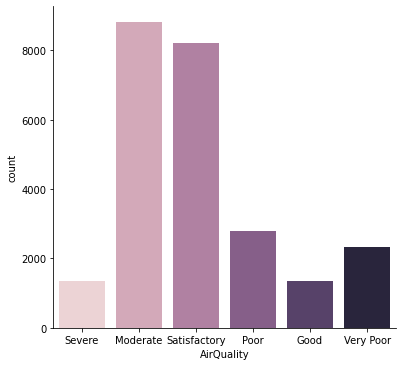

In [0]:
df6= df5.toPandas()
sns.catplot(x = "AirQuality", kind= "count", palette = "ch: 2.87", height=5, aspect=1.1, data = df6) 

Out[11]: <AxesSubplot:xlabel='City'>

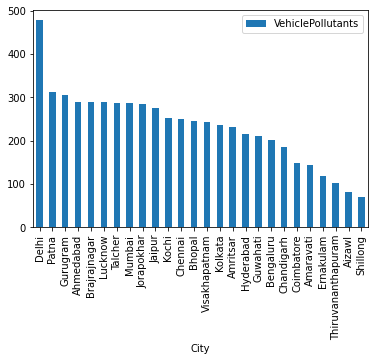

In [0]:
df6[['VehiclePollutants', 'City']].groupby(['City']).median().sort_values("VehiclePollutants", ascending = False).plot.bar()

Out[12]: <AxesSubplot:xlabel='City'>

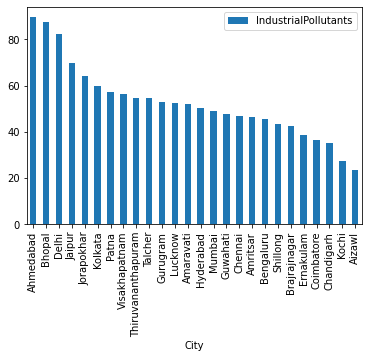

In [0]:
df6[['IndustrialPollutants', 'City']].groupby(['City']).median().sort_values("IndustrialPollutants", ascending = False).plot.bar()

In [0]:
display(df)

City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Ahmedabad,2015-01-01T00:00:00.000+0000,null,null,0.92,18.22,17.15,null,0.92,27.64,133.36,0.0,0.02,0.0,null,null
Ahmedabad,2015-01-02T00:00:00.000+0000,null,null,0.97,15.69,16.46,null,0.97,24.55,34.06,3.68,5.5,3.77,null,null
Ahmedabad,2015-01-03T00:00:00.000+0000,null,null,17.4,19.3,29.7,null,17.4,29.07,30.7,6.8,16.4,2.25,null,null
Ahmedabad,2015-01-04T00:00:00.000+0000,null,null,1.7,18.48,17.97,null,1.7,18.59,36.08,4.43,10.14,1.0,null,null
Ahmedabad,2015-01-05T00:00:00.000+0000,null,null,22.1,21.42,37.76,null,22.1,39.33,39.31,7.01,18.89,2.78,null,null
Ahmedabad,2015-01-06T00:00:00.000+0000,null,null,45.41,38.48,81.5,null,45.41,45.76,46.51,5.42,10.83,1.93,null,null
Ahmedabad,2015-01-07T00:00:00.000+0000,null,null,112.16,40.62,130.77,null,112.16,32.28,33.47,0.0,0.0,0.0,null,null
Ahmedabad,2015-01-08T00:00:00.000+0000,null,null,80.87,36.74,96.75,null,80.87,38.54,31.89,0.0,0.0,0.0,null,null
Ahmedabad,2015-01-09T00:00:00.000+0000,null,null,29.16,31.0,48.0,null,29.16,58.68,25.75,0.0,0.0,0.0,null,null
Ahmedabad,2015-01-10T00:00:00.000+0000,null,null,null,7.04,0.0,null,null,8.29,4.55,0.0,0.0,0.0,null,null


In [0]:
#using SARIMA With Pandas

In [0]:
#importing day-wise data of cities
df= df.toPandas()

df['Date'] = pd.to_datetime(df['Date'])

#visualizing the top rows of the dataset
df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [0]:
cities_all = df.pivot_table(values='AQI', index=['Date'], columns='City')
cities_all=cities_all.add_suffix('_AQI')
cities=cities_all.resample(rule='MS').mean()
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,Delhi_AQI,Ernakulam_AQI,Gurugram_AQI,Guwahati_AQI,Hyderabad_AQI,Jaipur_AQI,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342.290323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.928571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,256.064516,NaN,NaN,NaN,120.000000,NaN,NaN,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,305.266667,NaN,NaN,NaN,140.807692,NaN,NaN,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,348.580645,NaN,NaN,NaN,133.387097,NaN,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
cities['India_AQI']=cities.mean(axis=1)
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,Delhi_AQI,Ernakulam_AQI,Gurugram_AQI,Guwahati_AQI,Hyderabad_AQI,Jaipur_AQI,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342.290323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.311828
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.928571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.284286
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,256.064516,NaN,NaN,NaN,120.000000,NaN,NaN,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN,258.875688
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,305.266667,NaN,NaN,NaN,140.807692,NaN,NaN,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN,193.815995
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,348.580645,NaN,NaN,NaN,133.387097,NaN,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,193.556272


Out[18]: <AxesSubplot:xlabel='Date'>

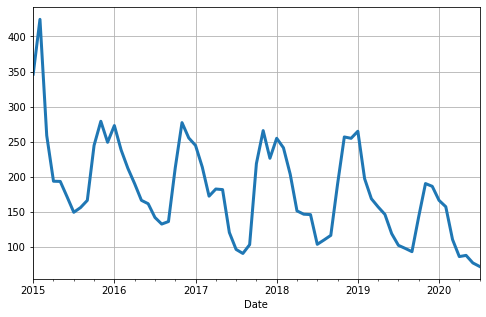

In [0]:
cities.reset_index()

#plot India's AQI
cities['India_AQI'].plot(kind='line',grid=True,figsize=(8, 5), linewidth=3)

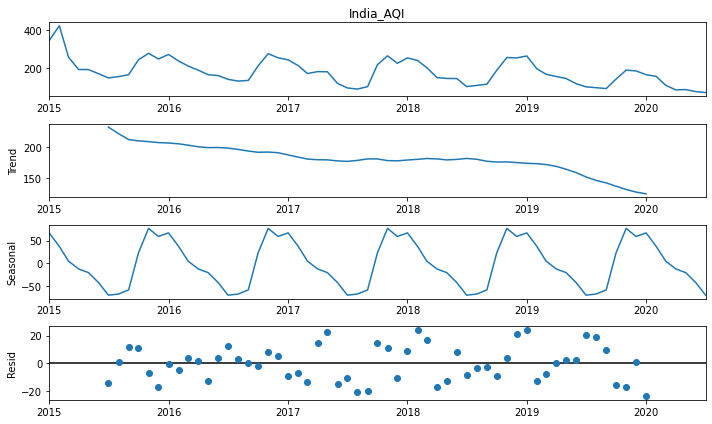

In [0]:
plt.rcParams['figure.figsize'] = (10, 6);
cities['India_AQI']=cities.mean(axis=1)
fig = seasonal_decompose(cities['India_AQI'], model='additive').plot()

In [0]:
dftest = adfuller(cities['India_AQI'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Out[20]: Test Statistic                 -0.114224
p-value                         0.948003
#Lags Used                     10.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64

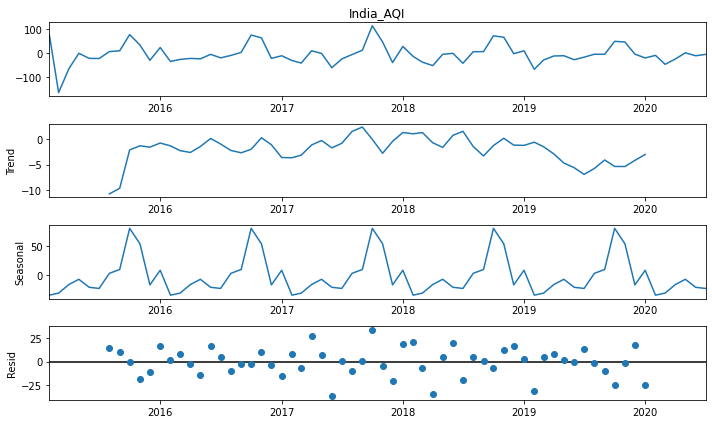

In [0]:
diff = cities['India_AQI'].diff(periods=1)
diff.dropna(inplace=True)
fig = seasonal_decompose(diff, model='additive').plot()

In [0]:
dftest = adfuller(diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Out[22]: Test Statistic                -8.385232e+00
p-value                        2.448599e-13
#Lags Used                     9.000000e+00
Number of Observations Used    5.600000e+01
Critical Value (1%)           -3.552928e+00
Critical Value (5%)           -2.914731e+00
Critical Value (10%)          -2.595137e+00
dtype: float64

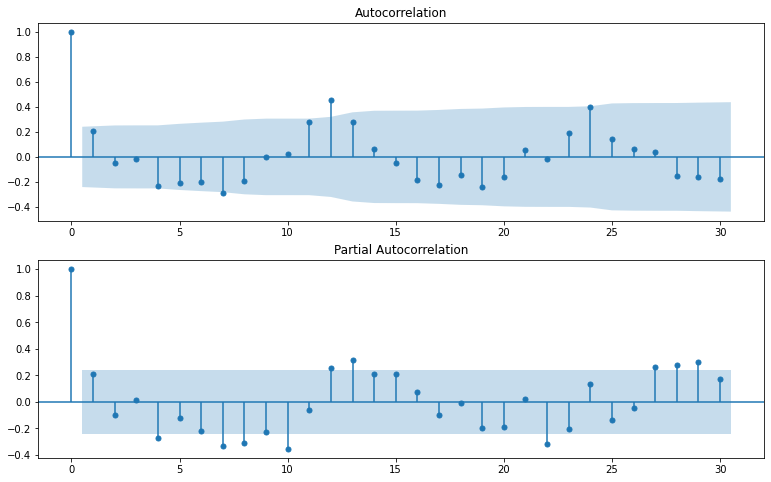

In [0]:
fig, ax = plt.subplots(2,figsize=(13, 8))
ax[0] = plot_acf(diff, lags=30, ax=ax[0])
ax[1] = plot_pacf(diff,lags=30, ax=ax[1])

In [0]:
from pmdarima import auto_arima;  

In [0]:
auto_arima(y=cities['India_AQI'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

SARIMAX Results 
 
 Dep. Variable: y No. Observations: 67 
 
 
 Model: SARIMAX(0, 1, 2)x(1, 0, [1], 12) Log Likelihood -316.908 
 
 
 Date: Tue, 15 Feb 2022 AIC 643.816 
 
 
 Time: 17:53:58 BIC 654.765 
 
 
 Sample: 0 HQIC 648.143 
 
 
 - 67 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ma.L1 0.0189 0.059 0.320 0.749 -0.097 0.135 
 
 
 ma.L2 -0.8363 0.069 -12.077 0.000 -0.972 -0.701 
 
 
 ar.S.L12 0.9444 0.062 15.221 0.000 0.823 1.066 
 
 
 ma.S.L12 -0.5623 0.229 -2.458 0.014 -1.011 -0.114 
 
 
 sigma2 694.3700 142.982 4.856 0.000 414.130 974.610 
 
 
 
 
 Ljung-Box (L1) (Q): 0.95 Jarque-Bera (JB): 2.99 
 
 
 Prob(Q): 0.33 Prob(JB): 0.22 
 
 
 Heteroskedasticity (H): 0.38 Skew: -0.52 
 
 
 Prob(H) (two-sided): 0.03 Kurtosis: 2.99 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

In [0]:
#dividing into train and test:
train_data=cities['India_AQI'][:'2018-12']
test_data=cities['India_AQI'][:'2019-12']

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit(start_params=[0, 0, 0, 0, 1])

#printing summry of model reults
results.summary()

SARIMAX Results 
 
 Dep. Variable: India_AQI No. Observations: 48 
 
 
 Model: SARIMAX(0, 1, 2)x(1, 0, [1], 12) Log Likelihood -229.813 
 
 
 Date: Tue, 15 Feb 2022 AIC 469.625 
 
 
 Time: 17:54:02 BIC 478.876 
 
 
 Sample: 01-01-2015 HQIC 473.106 
 
 
 - 12-01-2018 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ma.L1 0.0646 0.611 0.106 0.916 -1.133 1.262 
 
 
 ma.L2 -0.9324 0.600 -1.555 0.120 -2.108 0.243 
 
 
 ar.S.L12 0.9183 0.097 9.440 0.000 0.728 1.109 
 
 
 ma.S.L12 -0.4473 0.301 -1.484 0.138 -1.038 0.143 
 
 
 sigma2 767.0496 452.771 1.694 0.090 -120.365 1654.464 
 
 
 
 
 Ljung-Box (L1) (Q): 0.23 Jarque-Bera (JB): 3.61 
 
 
 Prob(Q): 0.63 Prob(JB): 0.16 
 
 
 Heteroskedasticity (H): 0.24 Skew: -0.66 
 
 
 Prob(H) (two-sided): 0.01 Kurtosis: 3.28 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Out[32]: <AxesSubplot:xlabel='Date'>

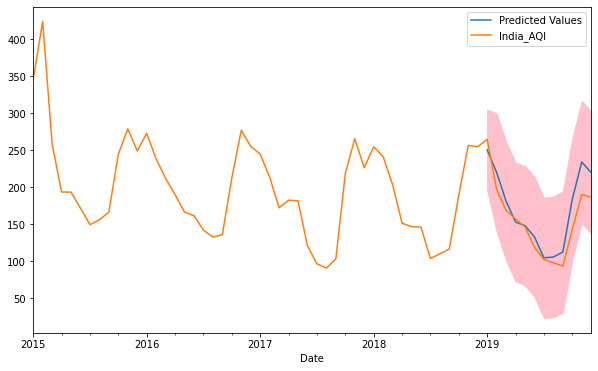

In [0]:
fig, ax= plt.subplots(figsize=(10,6))

#predict the next 12 months values to compare with the test dataset
forecasts = results.get_forecast(steps=12, dynamic=True)

#find the confidence intervals
confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

#plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

In [0]:
from sklearn.metrics import mean_squared_error

test= cities['India_AQI']['2019-01':'2019-12']
RMSE=np.sqrt(mean_squared_error(forecasts.predicted_mean,test))
print('RMSE = ',RMSE)

y_true=test
y_pred= forecasts.predicted_mean
mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE = ', mape)

RMSE =  22.75574809440047
MAPE =  11.64079759080719


Out[34]: <AxesSubplot:xlabel='Date'>

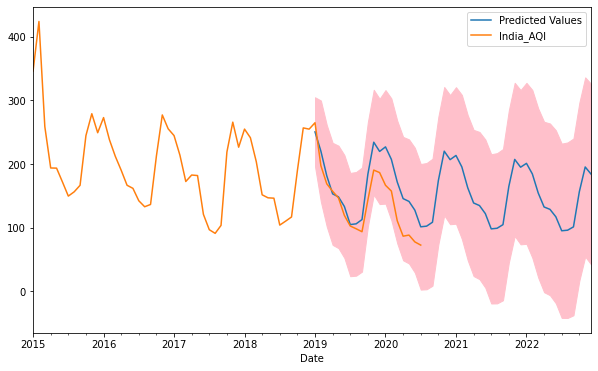

In [0]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts = results.get_forecast(steps=48, dynamic=True)

confidence_intervals=forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']

#plot the forecasted data
forecasts.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

#plot the confidence interval as the shaded area
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#Plot India's AQI Data
cities['India_AQI'].plot(legend=True, ax=ax)

In [0]:
#using xgboost to predict (working_model)

In [0]:
from pyspark.sql import SparkSession
import pyspark
spark = SparkSession.builder.master('local').getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [0]:
#taking cityhour dataset
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType
cityhour1 = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/city_hour.csv"))

In [0]:
cityhour2 = cityhour1.withColumnRenamed("AQI_Bucket", "AirQuality")\
        .withColumnRenamed("PM2.5", "PM25")
cityhour2.show()

+---------+-------------------+----+----+----+-----+-----+----+----+------+------+-------+-------+------+----+----------+
|     City|           Datetime|PM25|PM10|  NO|  NO2|  NOx| NH3|  CO|   SO2|    O3|Benzene|Toluene|Xylene| AQI|AirQuality|
+---------+-------------------+----+----+----+-----+-----+----+----+------+------+-------+-------+------+----+----------+
|Ahmedabad|2015-01-01 01:00:00|null|null| 1.0|40.01|36.37|null| 1.0|122.07|  null|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 02:00:00|null|null|0.02|27.75|19.73|null|0.02|  85.9|  null|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 03:00:00|null|null|0.08|19.32|11.08|null|0.08| 52.83|  null|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 04:00:00|null|null| 0.3|16.45|  9.2|null| 0.3| 39.53|153.58|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 05:00:00|null|null|0.12| 14.9| 7.85|null|0.12| 32.63|  null|    0.0|    0.0|   0.0|null|      null|
|Ahmedabad|2015-01-01 06

In [0]:
cityhour2 = cityhour2.dropDuplicates()

In [0]:
cityhour = cityhour2
for index, element in enumerate(["PM25","PM10","NO","NO2","Nox","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","AQI"]):
  cityhour = cityhour.na.fill(updated_df.groupBy().avg().collect()[0][index], [element])
cityhour.show()

+---------+-------------------+-----------------+------------------+----+-----+-----+-----------------+----+------+---------------+-------+-------+------+------------------+----------+
|     City|           Datetime|             PM25|              PM10|  NO|  NO2|  NOx|              NH3|  CO|   SO2|             O3|Benzene|Toluene|Xylene|               AQI|AirQuality|
+---------+-------------------+-----------------+------------------+----+-----+-----+-----------------+----+------+---------------+-------+-------+------+------------------+----------+
|Ahmedabad|2015-01-01 07:00:00|67.45057794890504|118.12710293078617|0.45|15.94|12.47|23.48347601937101|0.45| 27.41|         191.96|    0.0|    0.0|   0.0|166.46358148893358|      null|
|Ahmedabad|2015-01-01 04:00:00|67.45057794890504|118.12710293078617| 0.3|16.45|  9.2|23.48347601937101| 0.3| 39.53|         153.58|    0.0|    0.0|   0.0|166.46358148893358|      null|
|Ahmedabad|2015-01-01 12:00:00|67.45057794890504|118.12710293078617|1.73|12

In [0]:
#splitting date to 3 columns
split_date=pyspark.sql.functions.split(cityhour['Datetime'], '-')     
cityhour= cityhour.withColumn('Year', split_date.getItem(0))
cityhour= cityhour.withColumn('Month', split_date.getItem(1))
cityhour= cityhour.withColumn('Time', split_date.getItem(2))

In [0]:
display(cityhour)

City,Datetime,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AirQuality,Year,Month,Time
Ahmedabad,2015-01-07T22:00:00.000+0000,67.45057794890504,118.12710293078617,82.25,37.0,121.82,23.48347601937101,82.25,42.61,17.21,0.0,0.0,0.0,166.46358148893358,null,2015,01,07 22:00:00
Ahmedabad,2015-01-10T05:00:00.000+0000,67.45057794890504,118.12710293078617,17.57472966202988,28.5606590611272,0.0,23.48347601937101,2.248598209085566,14.531977255910471,34.491430475517,0.0,0.0,0.0,166.46358148893358,null,2015,01,10 05:00:00
Ahmedabad,2015-01-29T07:00:00.000+0000,76.03,118.12710293078617,0.17,24.26,20.4,23.48347601937101,0.17,20.24,36.42,0.0,0.0,0.33,166.46358148893358,null,2015,01,29 07:00:00
Ahmedabad,2015-01-01T07:00:00.000+0000,67.45057794890504,118.12710293078617,0.45,15.94,12.47,23.48347601937101,0.45,27.41,191.96,0.0,0.0,0.0,166.46358148893358,null,2015,01,01 07:00:00
Ahmedabad,2015-01-03T20:00:00.000+0000,67.45057794890504,118.12710293078617,5.5,39.19,48.77,23.48347601937101,5.5,20.53,17.67,7.9,21.42,3.22,166.46358148893358,null,2015,01,03 20:00:00
Ahmedabad,2015-01-09T23:00:00.000+0000,67.45057794890504,118.12710293078617,17.57472966202988,1.88,0.0,23.48347601937101,2.248598209085566,4.25,12.75,0.0,0.0,0.0,166.46358148893358,null,2015,01,09 23:00:00
Ahmedabad,2015-01-21T10:00:00.000+0000,67.45057794890504,118.12710293078617,20.32,63.3,88.05,23.48347601937101,20.32,131.53,15.0,3.05,0.0,11.38,166.46358148893358,null,2015,01,21 10:00:00
Ahmedabad,2015-01-23T14:00:00.000+0000,67.45057794890504,118.12710293078617,0.32,13.3,9.03,23.48347601937101,0.32,27.08,60.5,0.0,0.0,0.93,166.46358148893358,null,2015,01,23 14:00:00
Ahmedabad,2015-01-25T03:00:00.000+0000,67.45057794890504,118.12710293078617,17.57472966202988,14.55,8.63,23.48347601937101,2.248598209085566,44.43,38.04,0.0,0.0,0.0,166.46358148893358,null,2015,01,25 03:00:00
Ahmedabad,2015-01-25T22:00:00.000+0000,67.45057794890504,118.12710293078617,17.57472966202988,24.55,25.5,23.48347601937101,2.248598209085566,40.98,44.21,0.0,0.0,2.53,166.46358148893358,null,2015,01,25 22:00:00


In [0]:
split_date=pyspark.sql.functions.split(cityhour['Time'], ' ')     
cityhour= cityhour.withColumn('Day', split_date.getItem(0))

In [0]:
display(cityhour)

City,Datetime,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AirQuality,Year,Month,Time,Day
Ahmedabad,2015-01-07T22:00:00.000+0000,67.45057794890504,118.12710293078617,82.25,37.0,121.82,23.48347601937101,82.25,42.61,17.21,0.0,0.0,0.0,166.46358148893358,null,2015,01,07 22:00:00,07
Ahmedabad,2015-01-10T05:00:00.000+0000,67.45057794890504,118.12710293078617,17.57472966202988,28.5606590611272,0.0,23.48347601937101,2.248598209085566,14.531977255910471,34.491430475517,0.0,0.0,0.0,166.46358148893358,null,2015,01,10 05:00:00,10
Ahmedabad,2015-01-29T07:00:00.000+0000,76.03,118.12710293078617,0.17,24.26,20.4,23.48347601937101,0.17,20.24,36.42,0.0,0.0,0.33,166.46358148893358,null,2015,01,29 07:00:00,29
Ahmedabad,2015-02-17T07:00:00.000+0000,58.78,118.12710293078617,1.47,15.66,14.28,23.48347601937101,1.47,62.12,15.29,2.37,2.82,0.0,324.0,Very Poor,2015,02,17 07:00:00,17
Ahmedabad,2015-02-19T16:00:00.000+0000,129.92,118.12710293078617,3.25,20.99,23.72,23.48347601937101,3.25,162.49,60.67,4.98,15.68,0.0,265.0,Poor,2015,02,19 16:00:00,19
Ahmedabad,2015-02-22T14:00:00.000+0000,91.7,118.12710293078617,2.42,18.45,14.92,23.48347601937101,2.42,51.95,93.12,0.0,0.0,0.0,525.0,Severe,2015,02,22 14:00:00,22
Ahmedabad,2015-02-24T08:00:00.000+0000,114.98,118.12710293078617,4.78,35.51,35.88,23.48347601937101,4.78,94.6,14.08,14.33,46.22,3.18,333.0,Very Poor,2015,02,24 08:00:00,24
Ahmedabad,2015-04-01T18:00:00.000+0000,31.63,118.12710293078617,2.92,14.3,17.17,23.48347601937101,2.92,26.39,74.58,3.52,8.5,0.0,250.0,Poor,2015,04,01 18:00:00,01
Ahmedabad,2015-04-05T18:00:00.000+0000,156.73,118.12710293078617,2.77,11.07,13.83,23.48347601937101,2.77,41.28,51.67,1.97,5.02,0.0,166.46358148893358,null,2015,04,05 18:00:00,05
Ahmedabad,2015-04-09T09:00:00.000+0000,53.13,118.12710293078617,3.37,18.53,21.75,23.48347601937101,3.37,54.48,41.96,4.82,12.17,0.87,277.0,Poor,2015,04,09 09:00:00,09


In [0]:
cityhour.printSchema()

root
 |-- City: string (nullable = true)
 |-- Datetime: timestamp (nullable = true)
 |-- PM25: double (nullable = false)
 |-- PM10: double (nullable = false)
 |-- NO: double (nullable = false)
 |-- NO2: double (nullable = false)
 |-- NOx: double (nullable = false)
 |-- NH3: double (nullable = false)
 |-- CO: double (nullable = false)
 |-- SO2: double (nullable = false)
 |-- O3: double (nullable = false)
 |-- Benzene: double (nullable = false)
 |-- Toluene: double (nullable = false)
 |-- Xylene: double (nullable = false)
 |-- AQI: double (nullable = false)
 |-- AirQuality: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Day: string (nullable = true)



In [0]:
print("The dataset has %d rows." % cityhour.count())

The dataset has 707875 rows.


In [0]:
cityhour= cityhour.drop("AirQuality")\
                  .drop("Time")\
                  .drop("Datetime")

In [0]:
from pyspark.sql.types import IntegerType
cityhour = cityhour.withColumn("Year", cityhour["Year"].cast(IntegerType()))
cityhour = cityhour.withColumn("Month", cityhour["Month"].cast(IntegerType()))
cityhour = cityhour.withColumn("Day", cityhour["Day"].cast(IntegerType()))

In [0]:
display(cityhour)

City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month,Day
Ahmedabad,67.45057794890504,118.12710293078617,82.25,37.0,121.82,23.48347601937101,82.25,42.61,17.21,0.0,0.0,0.0,166.46358148893358,2015,1,7
Ahmedabad,67.45057794890504,118.12710293078617,17.57472966202988,28.5606590611272,0.0,23.48347601937101,2.248598209085566,14.531977255910471,34.491430475517,0.0,0.0,0.0,166.46358148893358,2015,1,10
Ahmedabad,76.03,118.12710293078617,0.17,24.26,20.4,23.48347601937101,0.17,20.24,36.42,0.0,0.0,0.33,166.46358148893358,2015,1,29
Ahmedabad,67.45057794890504,118.12710293078617,0.45,15.94,12.47,23.48347601937101,0.45,27.41,191.96,0.0,0.0,0.0,166.46358148893358,2015,1,1
Ahmedabad,67.45057794890504,118.12710293078617,5.5,39.19,48.77,23.48347601937101,5.5,20.53,17.67,7.9,21.42,3.22,166.46358148893358,2015,1,3
Ahmedabad,67.45057794890504,118.12710293078617,17.57472966202988,1.88,0.0,23.48347601937101,2.248598209085566,4.25,12.75,0.0,0.0,0.0,166.46358148893358,2015,1,9
Ahmedabad,67.45057794890504,118.12710293078617,20.32,63.3,88.05,23.48347601937101,20.32,131.53,15.0,3.05,0.0,11.38,166.46358148893358,2015,1,21
Ahmedabad,67.45057794890504,118.12710293078617,0.32,13.3,9.03,23.48347601937101,0.32,27.08,60.5,0.0,0.0,0.93,166.46358148893358,2015,1,23
Ahmedabad,67.45057794890504,118.12710293078617,17.57472966202988,14.55,8.63,23.48347601937101,2.248598209085566,44.43,38.04,0.0,0.0,0.0,166.46358148893358,2015,1,25
Ahmedabad,67.45057794890504,118.12710293078617,17.57472966202988,24.55,25.5,23.48347601937101,2.248598209085566,40.98,44.21,0.0,0.0,2.53,166.46358148893358,2015,1,25


In [0]:
# Split the dataset randomly into 70% for training and 30% for testing. Passing a seed for deterministic behavior
train, test = cityhour.randomSplit([0.7, 0.3], seed = 0)
print("There are %d training examples and %d test examples." % (train.count(), test.count()))

There are 495450 training examples and 212425 test examples.


In [0]:
display(train.select("City", "AQI"))

City,AQI
Ahmedabad,214.0
Ahmedabad,183.0
Ahmedabad,205.0
Ahmedabad,382.0
Ahmedabad,436.0
Ahmedabad,355.0
Ahmedabad,182.0
Ahmedabad,196.0
Ahmedabad,413.0
Ahmedabad,227.0


In [0]:
from pyspark.ml.feature import StringIndexer
city_indexer = StringIndexer(inputCol="City", outputCol="CityIndex")
#Fits a model to the input dataset with optional parameters.
cityhour = city_indexer.fit(cityhour).transform(cityhour)
cityhour.show()

+---------+-----------------+------------------+-----------------+----------------+------------------+-----------------+-----------------+------------------+---------------+------------------+----------------+-----------------+------------------+----+-----+---+---------+
|     City|             PM25|              PM10|               NO|             NO2|               NOx|              NH3|               CO|               SO2|             O3|           Benzene|         Toluene|           Xylene|               AQI|Year|Month|Day|CityIndex|
+---------+-----------------+------------------+-----------------+----------------+------------------+-----------------+-----------------+------------------+---------------+------------------+----------------+-----------------+------------------+----+-----+---+---------+
|Ahmedabad|67.45057794890504|118.12710293078617|            82.25|            37.0|            121.82|23.48347601937101|            82.25|             42.61|          17.21|           

In [0]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer
 
# Remove the target column from the input feature set.
featuresCols = cityhour.columns
featuresCols.remove('AQI')
featuresCols.remove('City')
 
# vectorAssembler combines all feature columns into a single feature vector column, "rawFeatures".
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
 
# vectorIndexer identifies categorical features and indexes them, and creates a new column "features". 
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=4)

In [0]:
from sparkdl.xgboost import XgboostRegressor
 
# The next step is to define the model training stage of the pipeline. 
# The following command defines a XgboostRegressor model that takes an input column "features" by default and learns to predict the labels in the AQI column.
# If you are running Databricks Runtime for Machine Learning 9.0 ML or above, you can set the `num_workers` parameter to leverage the cluster for distributed training.
xgb_regressor = XgboostRegressor(num_workers=3, labelCol="AQI", missing=0.0)

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
 
# Define a grid of hyperparameters to test:
#  - maxDepth: maximum depth of each decision tree 
#  - maxIter: iterations, or the total number of trees 
paramGrid = ParamGridBuilder()\
  .addGrid(xgb_regressor.max_depth, [2, 5])\
  .addGrid(xgb_regressor.n_estimators, [10, 100])\
  .build()
 
# Define an evaluation metric.  The CrossValidator compares the true labels with predicted values for each combination of parameters, and calculates this value to determine the best model.
evaluator = RegressionEvaluator(metricName="rmse",
                                labelCol=xgb_regressor.getLabelCol(),
                                predictionCol=xgb_regressor.getPredictionCol())
 
# Declare the CrossValidator, which performs the model tuning.
cv = CrossValidator(estimator=xgb_regressor, evaluator=evaluator, estimatorParamMaps=paramGrid)

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[city_indexer,vectorAssembler, vectorIndexer, cv])

In [0]:
pipelineModel = pipeline.fit(train)

In [0]:
predictions = pipelineModel.transform(test)

In [0]:
display(predictions.select("AQI", "prediction", *featuresCols))

AQI,prediction,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Year,Month,Day,CityIndex
228.0,263.16363525390625,0.35,118.12710293078617,11.96,16.07,28.03,23.48347601937101,11.96,16.4,12.67,0.98,6.25,1.28,2016,8,11,2.0
262.0,250.8431396484375,0.64,118.12710293078617,12.0,8.33,20.83,23.48347601937101,12.0,6.17,2.55,2.33,3.33,0.0,2015,7,1,2.0
355.0,285.3768310546875,2.16,118.12710293078617,18.69,21.49,40.18,23.48347601937101,18.69,17.78,2.24,34.84,25.37,6.23,2016,8,10,2.0
182.0,168.09706115722656,3.45,118.12710293078617,4.07,4.88,17.9,23.48347601937101,4.07,6.65,34.491430475517,0.5,2.04,0.3,2016,9,11,2.0
166.46358148893358,349.9149475097656,3.54,118.12710293078617,14.19,50.46,35.2,23.48347601937101,14.19,26.8,1.74,7.58,33.92,0.65,2018,6,11,2.0
185.0,210.9808349609375,6.0,118.12710293078617,8.8,18.75,26.92,23.48347601937101,8.8,57.65,48.71,0.0,0.0,0.47,2015,5,8,2.0
178.0,205.62718200683594,6.06,118.12710293078617,6.59,8.25,14.84,23.48347601937101,6.59,5.28,5.17,0.52,2.71,0.0,2015,6,20,2.0
427.0,472.8713684082031,6.44,118.12710293078617,20.96,45.67,37.92,23.48347601937101,20.96,30.6,34.491430475517,3.94,16.02,0.65,2018,9,14,2.0
166.46358148893358,140.73208618164062,7.01,181.79,4.49,25.03,15.57,23.48347601937101,0.39,11.34,3.06,4.1,50.67,3.91,2020,6,19,2.0
302.0,266.9763488769531,7.42,118.12710293078617,17.0,14.91,31.91,23.48347601937101,17.0,25.47,20.5,0.0,0.0,0.0,2015,9,8,2.0


In [0]:
rmse = evaluator.evaluate(predictions)
print("RMSE on our test set: %g" % rmse)

RMSE on our test set: 76.5781


In [0]:
display(predictions.select("prediction","Year"))

prediction,Year
263.16363525390625,2016
250.8431396484375,2015
285.3768310546875,2016
168.09706115722656,2016
349.9149475097656,2018
210.9808349609375,2015
205.62718200683594,2015
472.8713684082031,2018
140.73208618164062,2020
266.9763488769531,2015


In [0]:
%sh
rm -rf /dbfs/tmp/xgboost/pipeline_004
rm -rf /dbfs/tmp/xgboost/pipelineModel_004

In [0]:
# Save the pipeline that created the model
pipeline.save('/tmp/xgboost/pipeline_004')
 
# Save the model itself
pipelineModel.save('/tmp/xgboost/pipelineModel_004')

---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
<command-2385747385554695> in <module>
      1 # Save the pipeline that created the model
----> 2 pipeline.save('/tmp/xgboost/pipeline_004')
      3 
      4 # Save the model itself
      5 pipelineModel.save('/tmp/xgboost/pipelineModel_004')

/databricks/spark/python/pyspark/ml/util.py in save(self, path)
    355     def save(self, path):
    356         """Save this ML instance to the given path, a shortcut of 'write().save(path)'."""
--> 357         self.write().save(path)
    358 
    359 

/databricks/spark/python/pyspark/ml/util.py in save(self, path)
    251         if self.shouldOverwrite:
    252             self._handleOverwrite(path)
--> 253         self.saveImpl(path)
    254 
    255     def saveImpl(self, path):

/databricks/spark/python/pyspark/ml/pipeline.py in saveImpl(self, path)
    205         stages = self.instance.

In [0]:
loaded_pipeline = Pipeline.load('/tmp/xgboost/pipeline_004')

In [0]:
from pyspark.ml import PipelineModel
 
loaded_pipelineModel = PipelineModel.load('/tmp/xgboost/pipelineModel_004')
 
# To represent new data, use the first 3 rows of the test dataset
new_data = test.limit(3)
 
# Make predictions with the loaded model
new_preds = loaded_pipelineModel.transform(new_data)
display(new_preds.select("prediction","Year", *featuresCols))

prediction,Year,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Year,Month,Day,CityIndex
247.4375,2016,0.35,118.12710293078617,11.96,16.07,28.03,23.48347601937101,11.96,16.4,12.67,0.98,6.25,1.28,2016,8,11,2.0
248.9056854248047,2015,0.64,118.12710293078617,12.0,8.33,20.83,23.48347601937101,12.0,6.17,2.55,2.33,3.33,0.0,2015,7,1,2.0
408.00616455078125,2016,2.16,118.12710293078617,18.69,21.49,40.18,23.48347601937101,18.69,17.78,2.24,34.84,25.37,6.23,2016,8,10,2.0
